In [1]:
#



In [2]:
#

import numpy as np

import matplotlib.pyplot as plt

from neuralnetwork.neural_network_module import NeuralNetwork, Layer

np.random.seed(101)


In [3]:
# from sklearn.datasets import fetch_openml

# mnist = fetch_openml("mnist_784", version=1)
# mnist.keys()


In [4]:
# X = np.asarray(mnist["data"])
# Y = np.asarray(mnist["target"], dtype=int)

# np.savetxt("data/mnist_data.csv", X, fmt = '%d', delimiter=",")
# np.savetxt("data/mnist_target.csv", Y, fmt = '%d', delimiter=",")

# XX = np.loadtxt("data/mnist_data.csv", delimiter=",")
# YY = np.loadtxt("data/mnist_target.csv", delimiter=",")

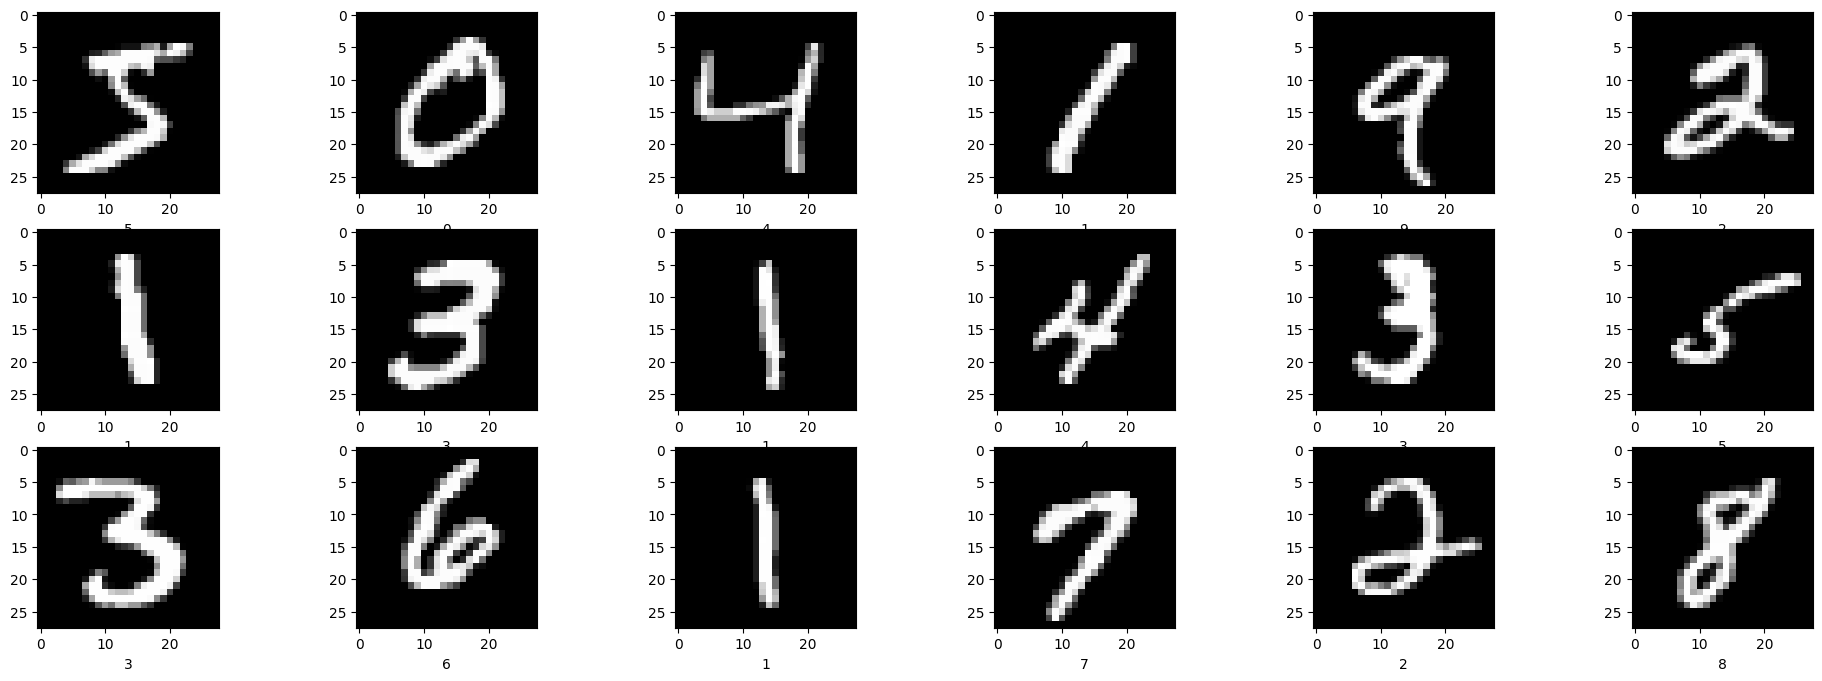

In [5]:
#

# X = np.asarray(mnist["data"])
# X = X/255
# m, n = X.shape

# Y = np.asarray(mnist["target"], dtype=int)

X = np.loadtxt("data/mnist_data.csv", delimiter=",")
X = X/255
Y = np.loadtxt("data/mnist_target.csv", delimiter=",", dtype=int)
Y = Y.reshape(-1,1)

# np.random.shuffle(data) # shuffle before splitting into dev and training sets

# data_dev = data[0:1000].T
# Y_dev = data_dev[0]
# X_dev = data_dev[1:n]
# X_dev = X_dev / 255.

# data_train = data[1000:m].T
# Y_train = data_train[0]
# X_train = data_train[1:n]
# X_train = X_train / 255.
# _,m_train = X_train.shape

X_train = X[0:60000,:]
X_test = X[60000:,:]

Y_train = Y[0:60000]
Y_test = Y[60000:]

#

plt.figure(figsize=(24,8))
for kp in range(18):
    plt.subplot(3,6,kp+1)
    plt.imshow(X_train[kp,:].reshape(28,28), cmap=plt.get_cmap('gray'))
    plt.xlabel(Y_train[kp,0])
plt.show()


In [16]:
#

def one_hot(Y, num_cols:int=10):
    # one_hot_Y = np.zeros((Y.size, Y.max()+1))
    one_hot_Y = np.zeros((Y.size, num_cols))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y

def get_predictions(Y):
    return np.argmax(Y, 1).reshape(-1,1)

def get_accuracy(Y_pred, Y):
    # print("Targets:     ", Y[0:24,:].T)
    # print("Predictions:", Y_pred[0:24,:].T)
    # print(f"Targets:     {[x for x in Y[0:24,0]]}")
    # print(f"Predictions: {[x for x in Y_pred[0:24,0]]}")
    return np.sum(Y_pred == Y)/Y.size

def gradient_descent(NN: "NeuralNetwork", X, Y, alpha, iterations=100, intervals=10):
    print(f"\nStarting training of {nn.name}")
    # W1, b1, W2, b2 = init_params()
    for k1 in range(iterations):
        # Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        NN._compute_output(X)
        # dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        NN._train_step(X, one_hot(Y[:,0], 10), alpha)
        # W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        Y_pred = get_predictions(NN._compute_output(X))
        if k1 % intervals == 0:
            print("")
            print(f"Iteration: {k1} | Train accuracy: {get_accuracy(Y_pred, Y):0.4f}")
            print(f"Targets:     {[x for x in Y[0:24,0]]}")
            print(f"Predictions: {[x for x in Y_pred[0:24,0]]}")
            # print("Predictions:", Y_pred[0:12,:].T)
            # print("Values:     ", Y[0:12,:].T)


In [17]:
#

nn = NeuralNetwork()

# layer_list = []
# layer_list.append(Layer(784, None))
# layer_list.append(Layer(28, "relu"))
# layer_list.append(Layer(10, "softmax"))
# nn._set_layers(layer_list)

nn._add_layers([Layer(784, None)])
nn._add_layers([Layer(28, "relu")])
nn._add_layers([Layer(10, "softmax")])

gradient_descent(nn, X_train, Y_train, 0.10, 100, 10)

print("")
print("Training Complete")
print(f"Train accuracy: {get_accuracy(get_predictions(nn._compute_output(X_train)), Y_train):0.4f}")
print(f"Test accuracy: {get_accuracy(get_predictions(nn._compute_output(X_test)), Y_test):0.4f}")


Neural Network NN06 initialized
Layer L16 initialized | Neurons: 784 | Activation: linear
NN06 added layer L16 with 784 neurons and linear activation
Layer L17 initialized | Neurons: 28 | Activation: relu
NN06 added layer L17 with 28 neurons and relu activation
Layer L18 initialized | Neurons: 10 | Activation: softmax
NN06 added layer L18 with 10 neurons and softmax activation

Starting training of NN06

Iteration: 0 | Train accuracy: 0.1503
Targets:     [5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1]
Predictions: [5, 7, 3, 2, 3, 7, 7, 5, 7, 8, 2, 2, 6, 6, 7, 8, 5, 2, 5, 7, 3, 6, 7, 2]

Iteration: 10 | Train accuracy: 0.4651
Targets:     [5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1]
Predictions: [7, 0, 4, 1, 9, 9, 1, 5, 7, 9, 1, 2, 3, 6, 8, 4, 5, 1, 6, 7, 4, 0, 9, 1]

Iteration: 20 | Train accuracy: 0.6206
Targets:     [5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1]
Predictions: [7, 0, 4, 1, 9, 9, 1, 5, 1, 9, 